<a href="https://colab.research.google.com/github/samuelshoun/Useful-MWEs/blob/main/monty_hall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I sometimes teach or mentor on the topic of probability and risked decision-making in oil & gas. A common teaching tool is the Monty Hall problem. In this notebook, I test the solution by simulating 1,000 trials and comparing the outcome of switching versus staying (keeping the original choice in door).

Learn more about the Monty Hall problem <a href='https://en.wikipedia.org/wiki/Monty_Hall_problem'>here</a>.

In [1]:
import numpy as np
import pandas as pd

In [2]:
# choose the number of trials
n = 1000

# label the door options
doors = ['A', 'B', 'C']

# true car location for each trial
car_at = np.random.choice(doors, size=n)

# randomly assigned contestant choice of door
contestant_choice = np.random.choice(doors, size=n)

# the door Monty opens after choosing from the remaining non-car doors
monte_opens = [np.random.choice([door for door in doors if door != car_at[i] and door != contestant_choice[i]]) for i in range(n)]

# the remaining door the contestant may switch to
switch = [[door for door in doors if door != contestant_choice[i] and door != monte_opens[i]][0] for i in range(n)]

In [ ]:
# create a dataframe for convenience
df = pd.DataFrame({
    'car_at': car_at,
    'contestant_choice': contestant_choice,
    'monty_opens': monte_opens,
    'switch': switch
    })

# label each trial as a win for switch or a win for stay (original choice)
df['stay_wins'] = (df['contestant_choice'] == df['car_at']).astype(int)
df['switch_wins'] = (df['switch'] == df['car_at']).astype(int)

# view the simulation
df.sample(10)

,car_at,contestant_choice,monty_opens,switch,stay_wins,switch_wins
86,B,C,A,B,0,1
65,A,A,C,B,1,0
420,A,A,B,C,1,0
817,C,C,A,B,1,0
526,B,C,A,B,0,1
846,C,B,A,C,0,1
279,A,B,C,A,0,1
911,B,C,A,B,0,1
96,C,B,A,C,0,1
315,B,B,C,A,1,0


In [4]:
# count the wins for stay versus switch
df[['stay_wins', 'switch_wins']].sum(axis=0)

stay_wins      341
switch_wins    659
dtype: int64

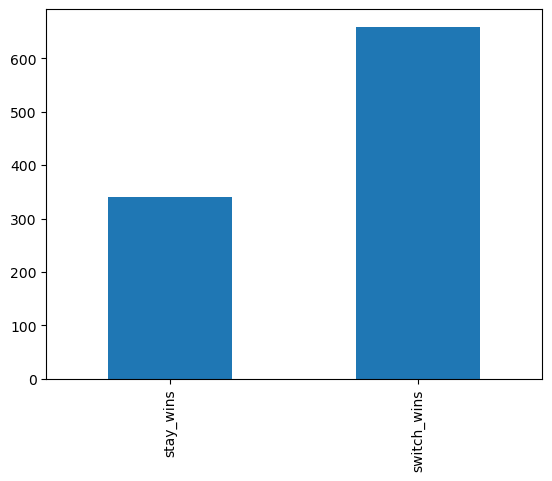

In [5]:
# plot the counts
df[['stay_wins', 'switch_wins']].sum(axis=0).plot(kind='bar');

We can see that, consistent with the common solution, switching door choices leads to twice as many wins as staying with the original choice.